# 

In [266]:
from spatial_filtering import arrays, constants, simulation
import numpy as np
import matplotlib.pyplot as plt

import importlib

importlib.reload(arrays)
importlib.reload(constants)
importlib.reload(simulation)

num_antenna = 100
num_frequencies = 1
f_base = 4e2
f_diff = 5e1

#f = np.array([f_base + n * f_diff for n in range(num_frequencies)])
wv = [constants.c / f_base]
d  = wv[0]/2

source_f = f_base
interferer_f = [f_base + f_diff]
source_theta_signal_deg = 40
interferer_theta_signal_deg = [135]
source_amplitude = 50
interferer_amplitude = [100]

array = arrays.UniformLinearArray(num_antenna, d)

t = np.linspace(0, 1, 1_000)
X_true = np.array([simulation.simulate(array, source_f, [], source_theta_signal_deg, [], source_amplitude, [], t, sigma=0)])
X = np.array([simulation.simulate(array, source_f, interferer_f, source_theta_signal_deg, interferer_theta_signal_deg, source_amplitude, interferer_amplitude, t, sigma=0)])
channel = 0
acm = X[channel, :, :] @ X[channel, :, :].conj().T#/ (len(t) - 1)
evals, evecs = np.linalg.eigh(acm)

num_interferers = 1

A = evecs[:, -num_interferers:]
#A = array.steering_vector(interferer_theta_signal_deg[0], wv) 
AH = A.conj().T

Amp: 50
Theta: 40
Amp: 100
Theta: 135
Amp: 50
Theta: 40


In [267]:
orth_proj = np.identity(A.shape[0]) -  A @ np.linalg.inv(AH @ A) @ AH
orth_proj

array([[ 0.99004369+0.00000000e+00j,  0.00801501-6.00737235e-03j,
        -0.00279883+9.66961728e-03j, ...,  0.00887387+4.73285163e-03j,
        -0.00988328+1.54793785e-03j,  0.00694233-7.11839993e-03j],
       [ 0.00801501+6.00737235e-03j,  0.98992308+1.34452604e-19j,
         0.0080875 -6.09548029e-03j, ..., -0.00428795-9.16428905e-03j,
         0.00889021+4.71718737e-03j, -0.00988375+1.54162963e-03j],
       [-0.00279883-9.66961728e-03j,  0.0080875 +6.09548029e-03j,
         0.98982203+1.65236119e-19j, ..., -0.00210202+9.94880298e-03j,
        -0.00428167-9.16354405e-03j,  0.00886499+4.74135717e-03j],
       ...,
       [ 0.00887387-4.73285163e-03j, -0.00428795+9.16428905e-03j,
        -0.00210202-9.94880298e-03j, ...,  0.98984108-3.47656790e-19j,
         0.00807294-6.07778172e-03j, -0.00280374+9.64461113e-03j],
       [-0.00988328-1.54793785e-03j,  0.00889021-4.71718737e-03j,
        -0.00428167+9.16354405e-03j, ...,  0.00807294+6.07778172e-03j,
         0.98994856+5.04214200e-20j

In [268]:
orth_proj

array([[ 0.99004369+0.00000000e+00j,  0.00801501-6.00737235e-03j,
        -0.00279883+9.66961728e-03j, ...,  0.00887387+4.73285163e-03j,
        -0.00988328+1.54793785e-03j,  0.00694233-7.11839993e-03j],
       [ 0.00801501+6.00737235e-03j,  0.98992308+1.34452604e-19j,
         0.0080875 -6.09548029e-03j, ..., -0.00428795-9.16428905e-03j,
         0.00889021+4.71718737e-03j, -0.00988375+1.54162963e-03j],
       [-0.00279883-9.66961728e-03j,  0.0080875 +6.09548029e-03j,
         0.98982203+1.65236119e-19j, ..., -0.00210202+9.94880298e-03j,
        -0.00428167-9.16354405e-03j,  0.00886499+4.74135717e-03j],
       ...,
       [ 0.00887387-4.73285163e-03j, -0.00428795+9.16428905e-03j,
        -0.00210202-9.94880298e-03j, ...,  0.98984108-3.47656790e-19j,
         0.00807294-6.07778172e-03j, -0.00280374+9.64461113e-03j],
       [-0.00988328-1.54793785e-03j,  0.00889021-4.71718737e-03j,
        -0.00428167+9.16354405e-03j, ...,  0.00807294+6.07778172e-03j,
         0.98994856+5.04214200e-20j

In [269]:
theta_rad = np.deg2rad(source_theta_signal_deg)
w = array.steering_vector(theta_rad, np.array([constants.c / source_f]))

oblique_proj = w @ np.linalg.inv(w.conj().T @ orth_proj @ w) @ w.conj().T @ orth_proj
oblique_proj

array([[ 0.01010742+0.0005045j , -0.00471803+0.0086771j ,
        -0.00574181-0.00777313j, ...,  0.004708  +0.00845078j,
        -0.00986476+0.00070279j,  0.00373647-0.0094189j ],
       [-0.00392887-0.00932622j,  0.00986477+0.0004881j ,
        -0.00451394+0.00854485j, ...,  0.00557289-0.0079072j ,
         0.00491147+0.00858399j, -0.01010748+0.00071805j],
       [-0.00669962+0.00758482j, -0.00383841-0.00910047j,
         0.00965709+0.00036156j, ..., -0.00954178-0.00159228j,
         0.00560468-0.00814831j,  0.0050305 +0.00879607j],
       ...,
       [ 0.0050272 -0.00878303j,  0.00559959+0.00813612j,
        -0.00953065+0.00159899j, ...,  0.00966663-0.00037038j,
        -0.00384092+0.00911344j, -0.00670548-0.00759693j],
       [-0.0100943 -0.00072075j,  0.00490269-0.00857412j,
         0.00557411+0.00789426j, ..., -0.00452602-0.00854962j,
         0.00987755-0.00049146j, -0.00393724+0.00933675j],
       [ 0.00372833+0.00940819j, -0.00985206-0.00069915j,
         0.00469581-0.00844626

In [270]:
Pw = (np.identity(A.shape[0]) - w @ np.linalg.pinv(w.conj().T @ w) @ w.conj().T)
new_proj = np.identity(A.shape[0]) - A @ np.linalg.pinv(AH @ Pw @ A) @ AH @ Pw

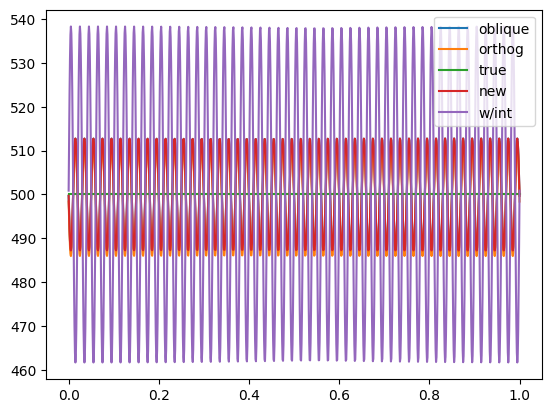

In [271]:
import matplotlib.pyplot as plt

plt.plot(t, np.abs((w.conj().T / np.linalg.norm(w) @ ((oblique_proj @ X)[0])))[0], label='oblique')
plt.plot(t, np.abs((w.conj().T / np.linalg.norm(w) @ ((orth_proj @ X)[0])))[0], label='orthog')
plt.plot(t, np.abs((w.conj().T / np.linalg.norm(w) @ (X_true[0])))[0], label='true')
plt.plot(t, np.abs(w.conj().T / np.linalg.norm(w) @ (new_proj @ X)[0])[0], label='new')
plt.plot(t, np.abs(w.conj().T / np.linalg.norm(w)  @ X[0])[0], label='w/int')
plt.legend()

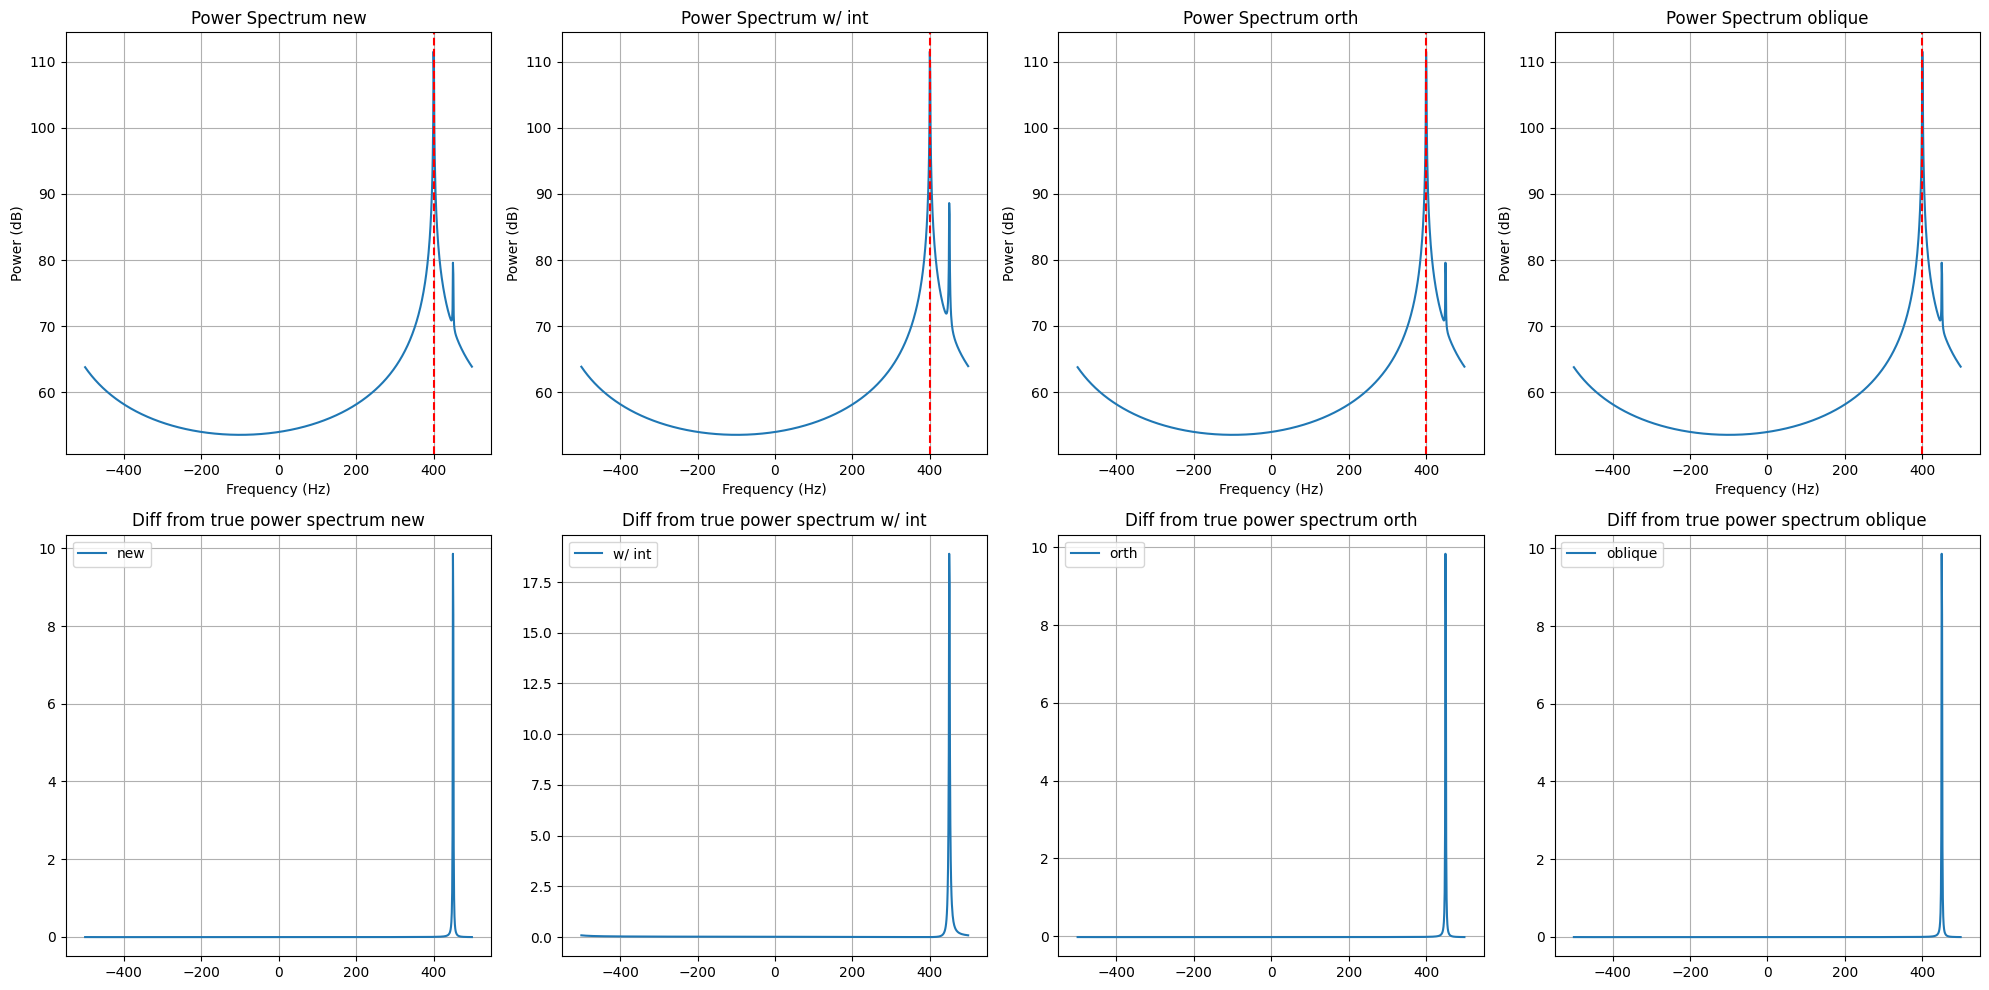

Sampling frequency: 1000.0 Hz
Frequency resolution: 1.000 Hz
Nyquist frequency: 500.0 Hz
Carrier frequency: 0.4 kHz
Beamformed signal shape: (1000,)
Signal power: 2.50e+05

Carrier frequency is within Nyquist limit.


In [272]:
def plot_spectrum(signals, labels, fs, f_carrier, true_signal):
    fig, axes = plt.subplots(2, len(labels), figsize=(20, 10))

    true_fft_vals = np.fft.fftshift(np.fft.fft(true_signal))
    true_fft_freq = np.fft.fftshift(np.fft.fftfreq(len(true_signal), d=1/fs))
    true_power_spectrum = np.abs(true_fft_vals) ** 2
    true_power_db = 10 * np.log10(true_power_spectrum + 1e-12)  # Adding small number to avoid log(0)

    
    for i, (signal, label) in enumerate(zip(signals, labels)):
        # FFT along time axis
        fft_vals = np.fft.fftshift(np.fft.fft(signal))
        fft_freq = np.fft.fftshift(np.fft.fftfreq(len(signal), d=1/fs))
        # Take only positive frequencies
        #pos_mask = fft_freq >= 0
        #fft_freq = fft_freq[pos_mask]
        #fft_vals = fft_vals[pos_mask]
    
        power_spectrum = np.abs(fft_vals) ** 2
        power_db = 10 * np.log10(power_spectrum + 1e-12)  # Adding small number to avoid log(0)
        
        axes[0,i].plot(fft_freq, power_db, label=label)
        axes[0,i].set_xlabel('Frequency (Hz)')
        axes[0,i].set_ylabel('Power (dB)')
        axes[0,i].set_title(f'Power Spectrum {label}')
        axes[0,i].grid(True)
        axes[0,i].axvline(f_carrier, color='red', linestyle='--', label=f'Carrier: {f_carrier/1e3:.1f} kHz')

        axes[1,i].plot(fft_freq, power_db - true_power_db, label=label)
        axes[1,i].grid(True)
        axes[1,i].set_title(f"Diff from true power spectrum {label}")
        axes[1,i].legend()
        
        
        
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    # Print some diagnostics
    print(f"Sampling frequency: {fs:.1f} Hz")
    print(f"Frequency resolution: {fs/len(signal):.3f} Hz")
    print(f"Nyquist frequency: {fs/2:.1f} Hz")
    print(f"Carrier frequency: {f_carrier/1e3:.1f} kHz")
    print(f"Beamformed signal shape: {signal.shape}")
    print(f"Signal power: {np.mean(np.abs(signal)**2):.2e}")
    
    # Additional analysis: Check if carrier is aliased
    if f_carrier > fs/2:
        aliased_freq = f_carrier - fs * np.floor(f_carrier / fs)
        print(f"\nWARNING: Carrier frequency ({f_carrier/1e3:.1f} kHz) > Nyquist frequency ({fs/2/1e3:.1f} kHz)")
        print(f"Carrier will appear aliased at: {aliased_freq/1e3:.1f} kHz")
    else:
        print(f"\nCarrier frequency is within Nyquist limit.")

plot_spectrum([((w.conj().T / np.linalg.norm(w)) @ (new_proj @ X))[0].flatten(),
               ((w.conj().T / np.linalg.norm(w)) @ (X))[0].flatten(),
               ((w.conj().T / np.linalg.norm(w)) @ (orth_proj @ X))[0].flatten(),
               ((w.conj().T / np.linalg.norm(w)) @ (oblique_proj @ X))[0].flatten(),
              ], ['new',  'w/ int', 'orth', 'oblique'], len(t) / t[-1], source_f, ((w.conj().T / np.linalg.norm(w)) @ (X_true))[0].flatten())